## 4.1　二値分類の例：映画レビューの分類

In [1]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import imdb

#### 4.1.1　IMdb データセット

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data[0][:10])
print(train_labels[0])
print(max([max(sequence) for sequence in train_data]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
1
9999


In [4]:
word_index = imdb.get_word_index()

In [5]:
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

#### 4.1.2　データの前処理を行う

In [6]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i , sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0][:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 4.1.3　モデルを構築する

In [9]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#### 4.1.4　アプローチを実施する

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5496 - accuracy: 0.7738 - val_loss: 0.4215 - val_accuracy: 0.8600
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3451 - accuracy: 0.8871 - val_loss: 0.3227 - val_accuracy: 0.8814
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2580 - accuracy: 0.9127 - val_loss: 0.2928 - val_accuracy: 0.8845
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2057 - accuracy: 0.9309 - val_loss: 0.2780 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1740 - accuracy: 0.9421 - val_loss: 0.2758 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1463 - accuracy: 0.9531 - val_loss: 0.2835 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1284 - accuracy: 0.9587 - val_loss: 0.2924 - val_accuracy: 0.8859
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

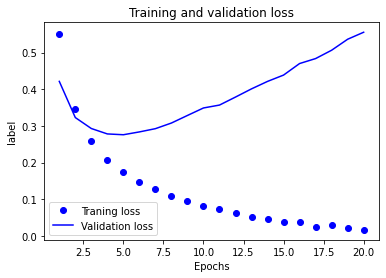

In [14]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Traning loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('label')
plt.legend()
plt.show()

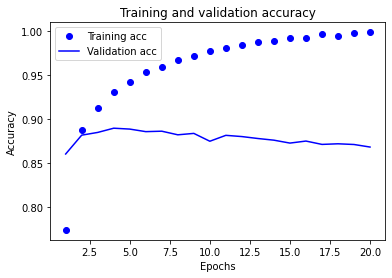

In [15]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.5036 - accuracy: 0.8014
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2973 - accuracy: 0.8980
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2288 - accuracy: 0.9185
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2798 - accuracy: 0.8884


In [17]:
results

[0.2797539234161377, 0.8883600234985352]

#### 4.1.5　訓練済みのモデルを使って新しいデータで予測値を生成する

In [18]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.2372331 ],
       [0.9992219 ],
       [0.88598496],
       ...,
       [0.08244465],
       [0.08797974],
       [0.5719296 ]], dtype=float32)